# Model:

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def gaussian_gaussian_logpdf(x):
    x = x.reshape(-1)
    prior_logpdf = norm.logpdf(x, loc=1, scale=5**0.5)
    likelihood_logpdf = sum(norm.logpdf(y, loc=x, scale=2**0.5)
                           for y in [8, 9])
    return prior_logpdf + likelihood_logpdf

def gaussian_gaussian_grad_logpdf(x):
    def grad_norm_logpdf_dx(x, loc, scale):
        # x: (batch_size or 1) x dim
        # loc: (batch_size or 1) x dim
        # scale: scalar
        assert len(x.shape) == 2
        assert len(loc.shape) == 2
        assert type(scale) == float
        assert x.shape[1] == loc.shape[1]
        return -(x - loc) / scale**2
    def grad_norm_logpdf_dmu(x, loc, scale):
        return grad_norm_logpdf_dx(loc, x, scale)
    prior_grad_logpdf = grad_norm_logpdf_dx(x, loc=np.array([[1.]]), scale=5**0.5)
    likelihood_grad_logpdf = sum(grad_norm_logpdf_dmu(y, loc=x, scale=2**0.5)
                                 for y in [np.array([[8]]), np.array([[9]])])
    return prior_grad_logpdf + likelihood_grad_logpdf

def f(X):
    return X.sum(axis=1)

fig, axes = plt.subplots(ncols=3)
X = np.arange(-10, 10, 0.01)
logpdf = gaussian_gaussian_logpdf(X.reshape(-1, 1))
grad_logpdf = gaussian_gaussian_grad_logpdf(X.reshape(-1, 1))
pdf = np.exp(logpdf) / np.exp(logpdf).sum()
axes[0].plot(X, pdf)
axes[1].plot(X, logpdf)
axes[2].plot(X, grad_logpdf)

In [2]:
from log_prob_model import HyperDistribution

def infer_expectation(f, logpdf, n_samples, grad_logpdf=None):
    process = HyperDistribution(1, None, None)  # 1-dimensional, default kernel parameters
#     X = np.array([[0.]])
#     process.observe(X, logpdf(X), None)
    def display(n):
        ex_samples = process.sample_expectation(f, 100)
        print(f"{n} samples. Integral: {ex_samples.mean():.4f} +- {ex_samples.std():.4f}")
        process.plot()
        plt.show()
    for n in range(n_samples):
        display(n)
        X = process.BOED(f, 10000).reshape(-1, 1)
        process.observe(X, logpdf(X), None if grad_logpdf is None else grad_logpdf(X))
    display(n_samples)

# Inference

## Infer without gradient information:

0 samples. Integral: -0.3501 +- 4.0746


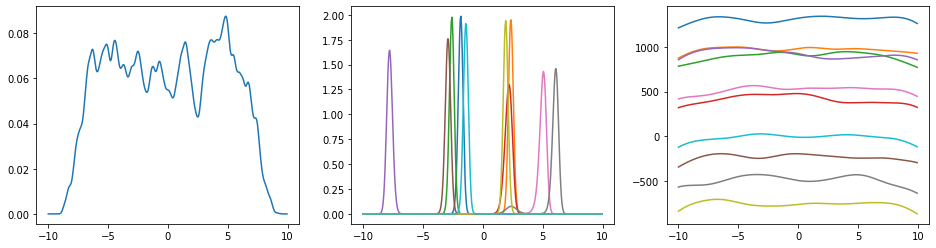

1 samples. Integral: 0.2101 +- 3.9150


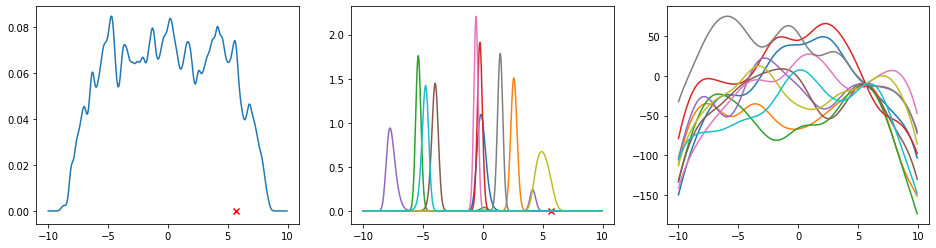

2 samples. Integral: 4.9958 +- 1.6095


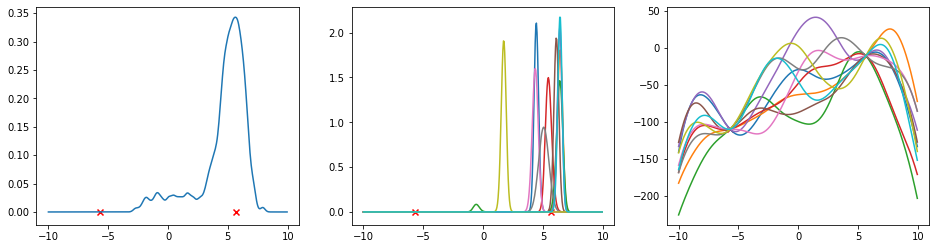

3 samples. Integral: 4.9781 +- 1.6048


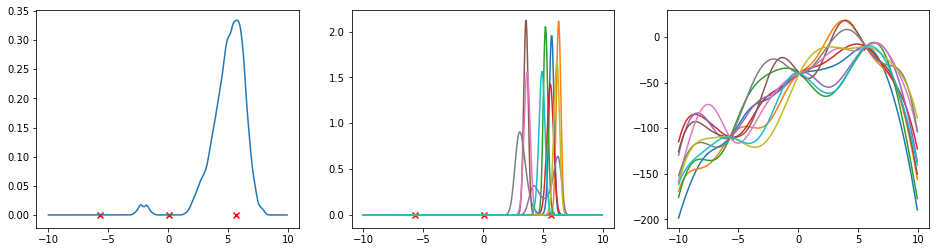

4 samples. Integral: 5.0347 +- 1.4882


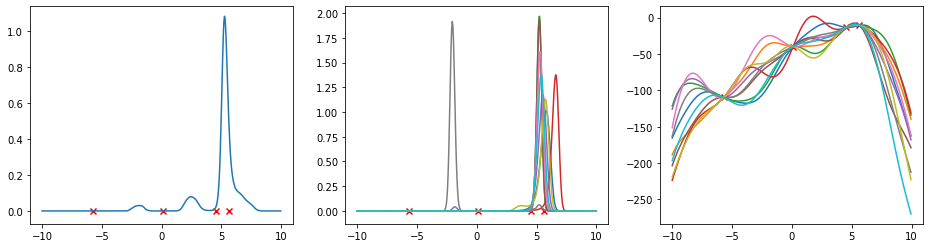

5 samples. Integral: 5.2975 +- 0.7631


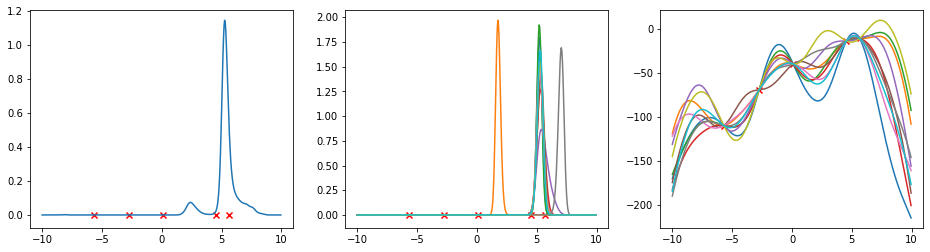

6 samples. Integral: 5.5663 +- 0.5180


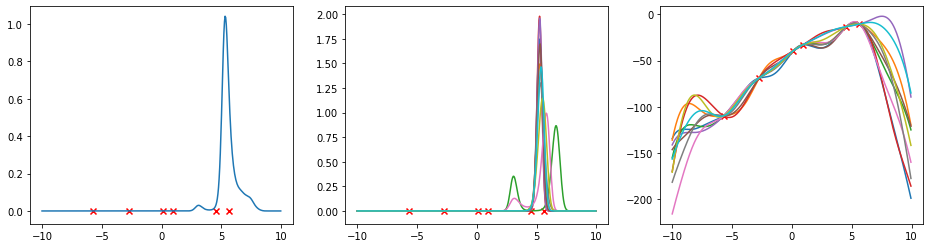

7 samples. Integral: 6.5996 +- 0.5908


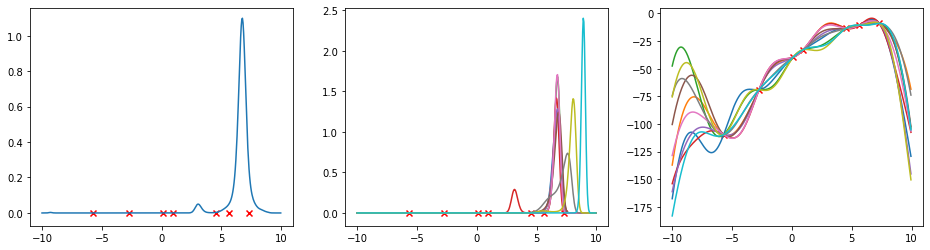

8 samples. Integral: 6.7118 +- 0.2614


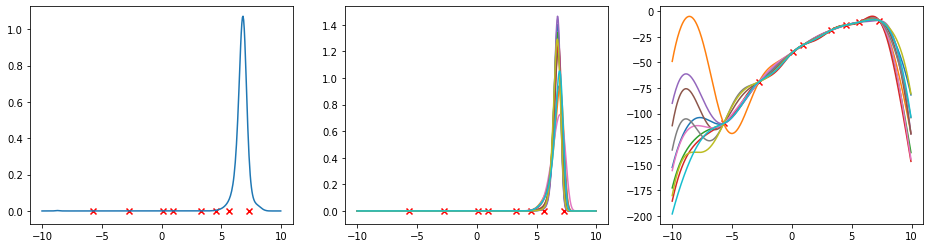

9 samples. Integral: 6.9271 +- 0.0816


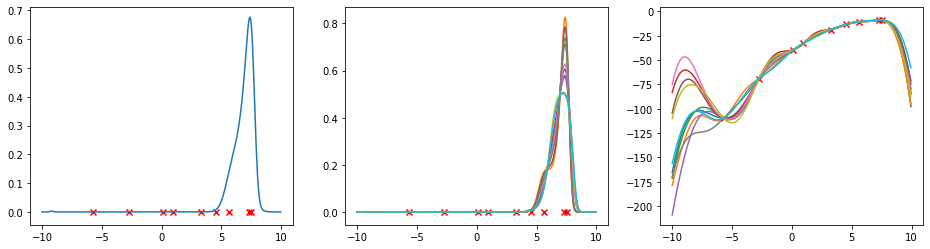

10 samples. Integral: 7.1651 +- 0.0109


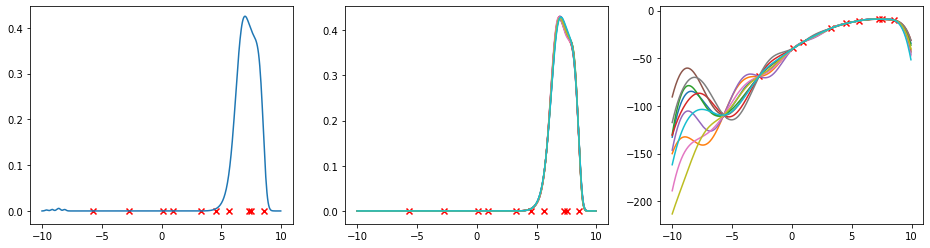

11 samples. Integral: 7.1624 +- 0.0115


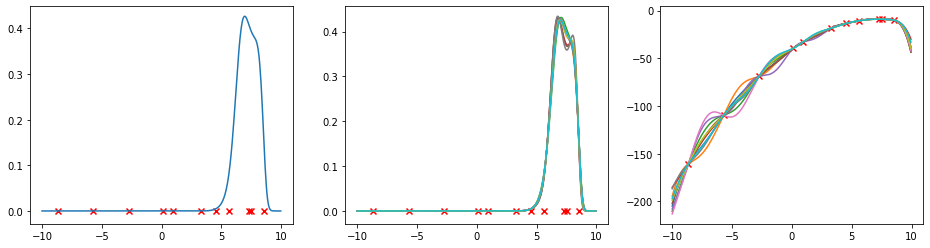

12 samples. Integral: 7.1802 +- 0.0036


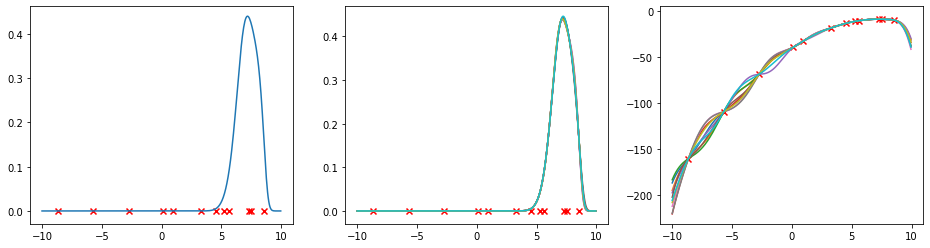

13 samples. Integral: 7.1906 +- 0.0047


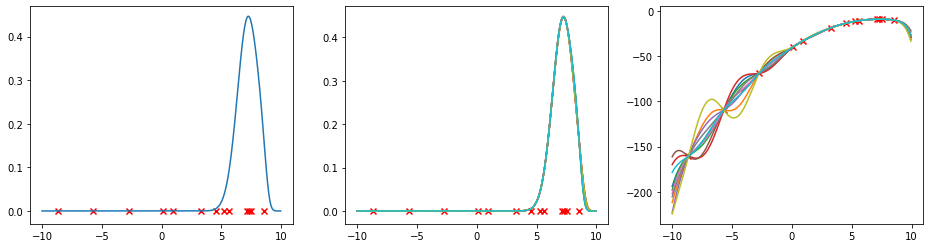

14 samples. Integral: 7.2350 +- 0.0013


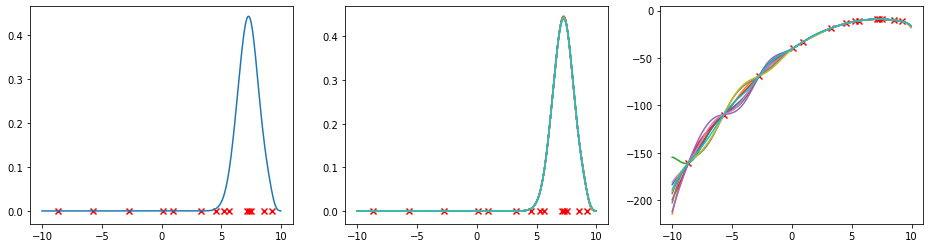

15 samples. Integral: 7.2365 +- 0.0012


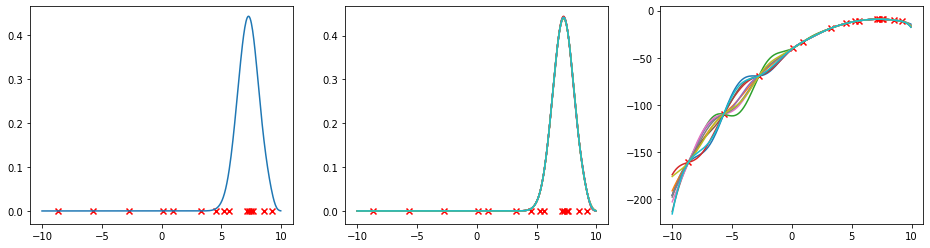

16 samples. Integral: 7.2456 +- 0.0007


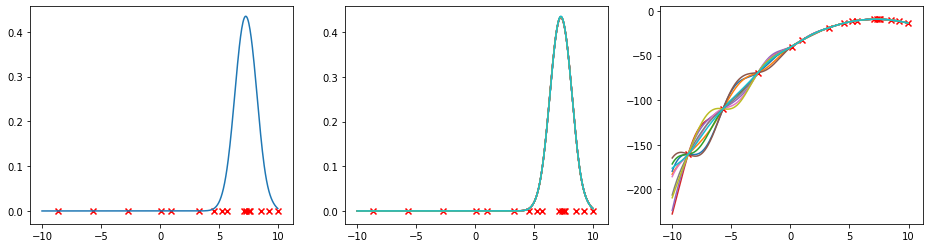

17 samples. Integral: 7.2470 +- 0.0006


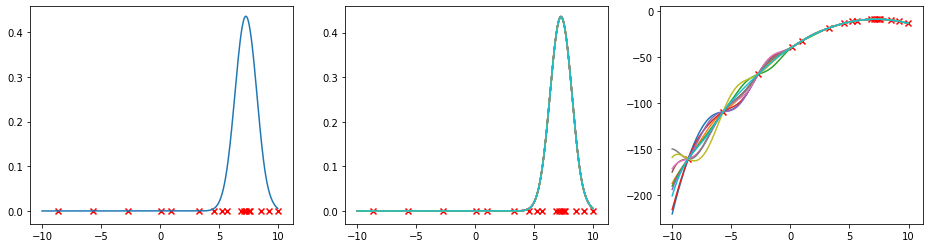

18 samples. Integral: 7.2469 +- 0.0005


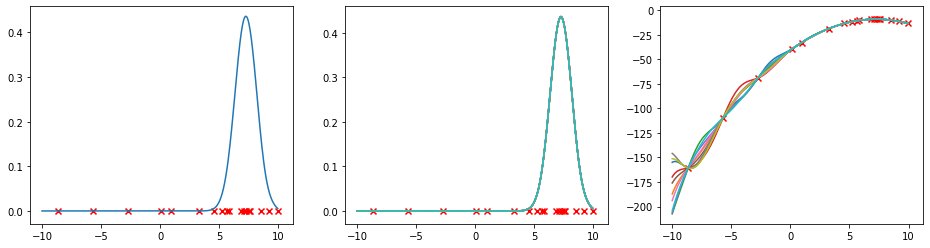

19 samples. Integral: 7.2466 +- 0.0004


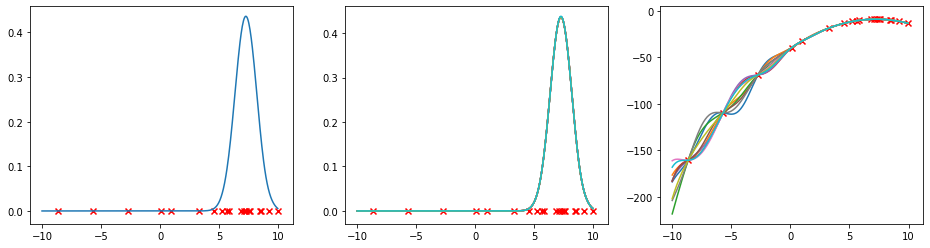

20 samples. Integral: 7.2467 +- 0.0005


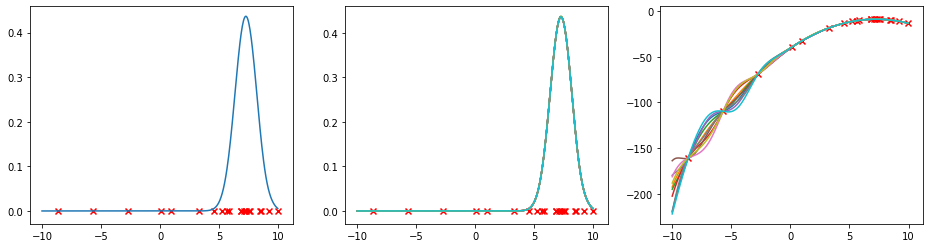

In [3]:
infer_expectation(f, gaussian_gaussian_logpdf, 20)

## Infer with gradient information:

0 samples. Integral: 0.0216 +- 4.2782


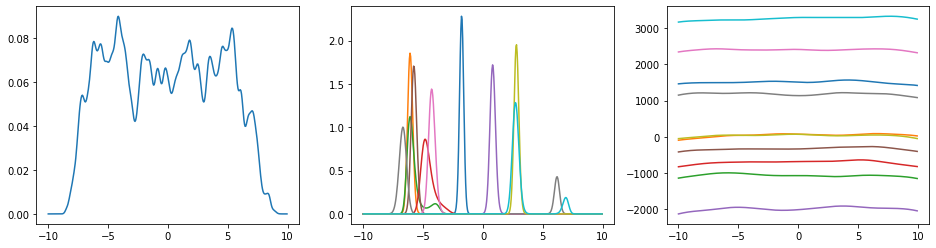

1 samples. Integral: 0.3221 +- 3.9002


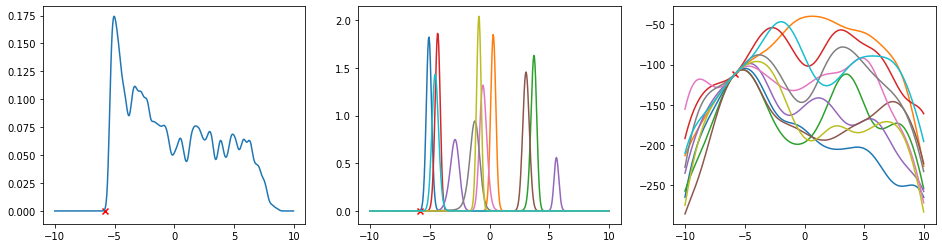

2 samples. Integral: 4.4485 +- 2.7095


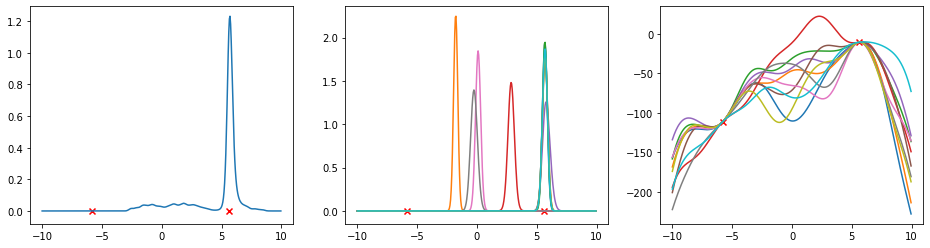

3 samples. Integral: 5.4457 +- 1.0939


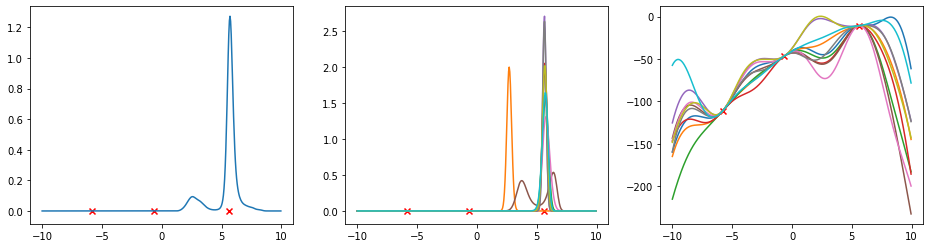

4 samples. Integral: 5.9267 +- 0.4468


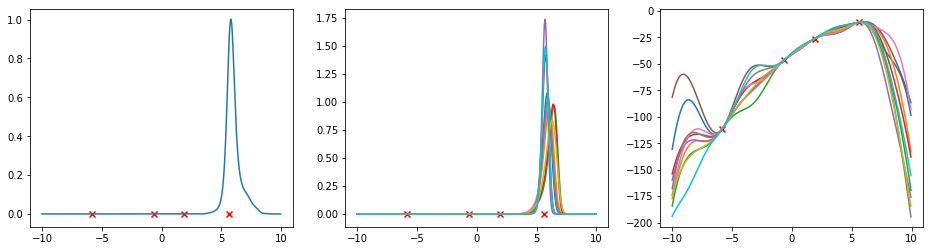

5 samples. Integral: 6.9473 +- 0.0537


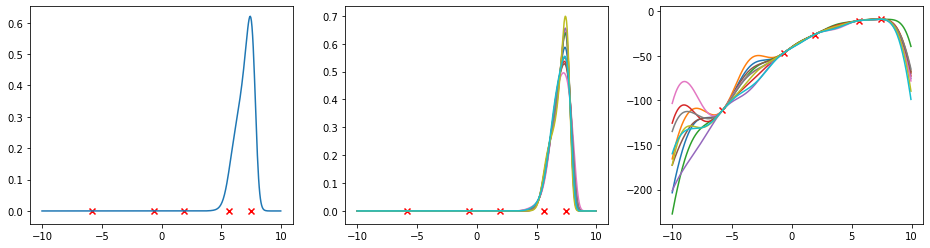

6 samples. Integral: 7.2119 +- 0.0061


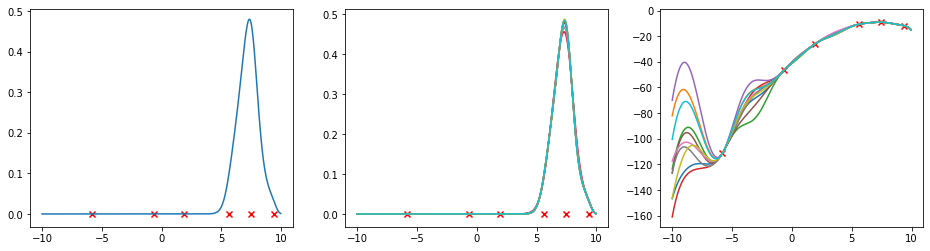

7 samples. Integral: 7.2113 +- 0.0060


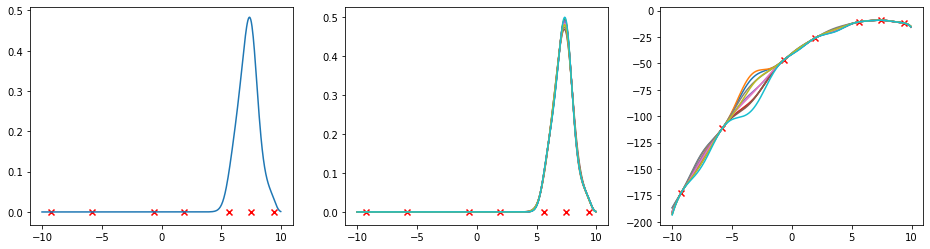

8 samples. Integral: 7.2600 +- 0.0041


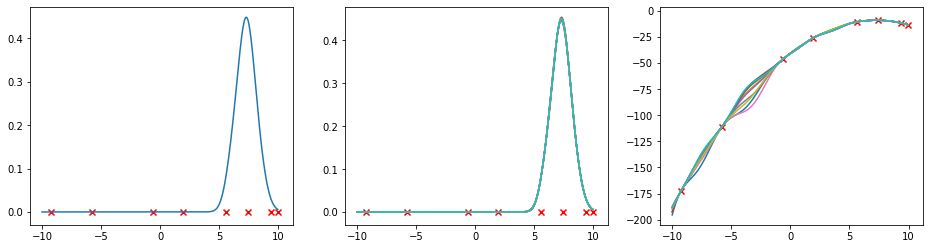

9 samples. Integral: 7.2448 +- 0.0005


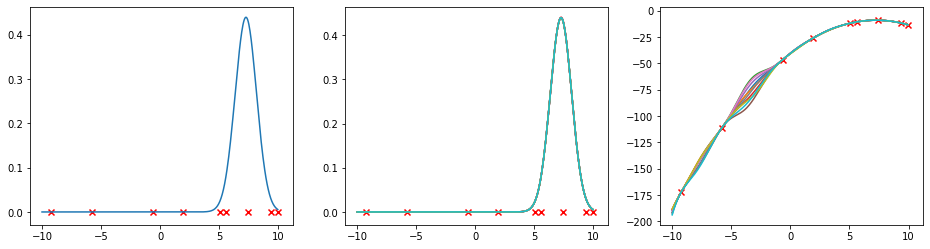

10 samples. Integral: 7.2456 +- 0.0004


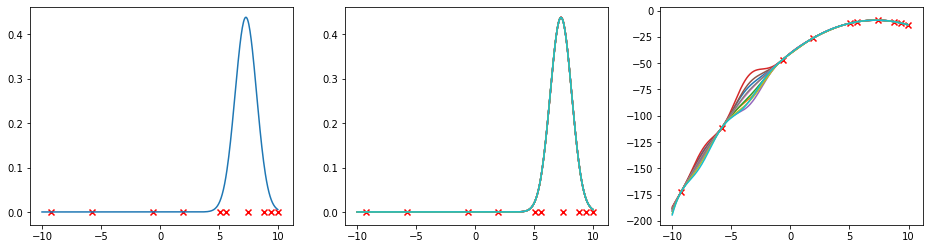

In [4]:
infer_expectation(f, gaussian_gaussian_logpdf, 10, gaussian_gaussian_grad_logpdf)